# Fandango's rating system was biased and dishonest
In October 2015, Walt Hickey from FiveThirtyEight published a popular article where he presented strong evidence which suggest that Fandango's movie rating system was biased and dishonest. In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.




# Understanding the Data
We'll work with two samples of movie ratings:the data in one sample was collected previous to Hickey's analysis, while the other sample was collected after. Let's start by reading in the two samples (which are stored as CSV files) and getting familiar with their structure.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
previous=pd.read_csv("fandango_score_comparison.csv")
after=pd.read_csv("movie_ratings_16_17.csv")
cols=["FILM","Fandango_Stars","Fandango_Ratingvalue","Fandango_votes","Fandango_Difference"]
new_cols=["movie","year","fandango"]
fandango_previous=previous[cols]
fandango_after=after[new_cols]
print(previous.head(10))


                             FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   RT_norm  RT_user_norm         ...           IMDB_norm  RT_norm_round  \
0     3.70 

In [6]:
sample=fandango_previous.sample(10,random_state=1)
print(sample)

                                                 FILM  Fandango_Stars  \
98                                    Get Hard (2015)             4.0   
66                                    The Gift (2015)             4.0   
53                                 Hot Pursuit (2015)             4.0   
75                                 San Andreas (2015)             4.5   
121             The Stanford Prison Experiment (2015)             4.0   
74   The Hobbit: The Battle of the Five Armies (2014)             4.5   
119                                    Phoenix (2015)             3.5   
128       Mission: Impossible â€“ Rogue Nation (2015)             4.5   
44                Kingsman: The Secret Service (2015)             4.5   
58                                 Seventh Son (2015)             3.5   

     Fandango_Ratingvalue  Fandango_votes  Fandango_Difference  
98                    3.9            5933                  0.1  
66                    3.7            2680                  0.3  
5

In [32]:
sample1=fandango_after.sample(10,random_state=0)
print(sample1)

                         movie  year  fandango
197    The Take (Bastille Day)  2016       4.0
37            Come and Find Me  2016       4.0
89                   Kickboxer  2016       4.0
176                The Founder  2016       4.0
170               The Darkness  2016       2.5
75   Ice Age: Collision Course  2016       4.0
96                        Lion  2016       4.0
137               Ride Along 2  2016       4.0
5              A Monster Calls  2016       4.0
83              Jane Got a Gun  2016       3.5


# Changing the Goal of our Analysis
At this point, we can either collect new data or change our the goal of our analysis. We choose the latter and place some limitations on our initial goal.

Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.




# Isolating the Samples We Need
With this new research goal, we have two populations of interest:

All Fandango's ratings for popular movies released in 2015.
All Fandango's ratings for popular movies released in 2016.
We need to be clear about what counts as popular movies. We'll use Hickey's benchmark of 30 fan ratings and count a movie as popular only if it has 30 fan ratings or more on Fandango's website.

Although one of the sampling criteria in our second sample is movie popularity, the sample doesn't provide information about the number of fan ratings. We should be skeptical once more and ask whether this sample is truly representative and contains popular movies (movies with over 30 fan ratings).

One quick way to check the representativity of this sample is to sample randomly 10 movies from it and then check the number of fan ratings ourselves on Fandango's website. Ideally, at least 8 out of the 10 movies have 30 fan ratings or more.




In [33]:
print(sample1)

                         movie  year  fandango
197    The Take (Bastille Day)  2016       4.0
37            Come and Find Me  2016       4.0
89                   Kickboxer  2016       4.0
176                The Founder  2016       4.0
170               The Darkness  2016       2.5
75   Ice Age: Collision Course  2016       4.0
96                        Lion  2016       4.0
137               Ride Along 2  2016       4.0
5              A Monster Calls  2016       4.0
83              Jane Got a Gun  2016       3.5


In [34]:
fandango_after.sample(10,random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Above we used a value of 1 as the random seed. This is good practice because it suggests that we weren't trying out various random seeds just to get a favorable sample.

As of April 2018, these are the fan ratings we found:

90% of the movies in our sample are popular. This is enough and we move forward with a bit more confidence.

Let's also double-check the other data set for popular movies. The documentation states clearly that there're only movies with at least 30 fan ratings, but it should take only a couple of seconds to double-check here.







In [35]:
(previous["Fandango_votes"]<30).sum()

0

it observes that hickey analysed the data on movies which has a fandango votes grtaer than 30 

If you explore the two data sets, you'll notice that there are movies with a releasing year different than 2015 or 2016. For our purposes, we'll need to isolate only the movies released in 2015 and 2016.

Let's start with Hickey's data set and isolate only the movies released in 2015. There's no special column for the releasing year, but we should be able to extract it from the strings in the FILM column.



In [36]:
fandango_previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [37]:
fandango_previous["YEAR"]=fandango_previous["FILM"].str[-5:-1]


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [38]:
fandango_previous.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,YEAR
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [39]:
fandango_previous["YEAR"].value_counts()

2015    129
2014     17
Name: YEAR, dtype: int64

In [40]:
fandango_2015=fandango_previous[fandango_previous["YEAR"]=="2015"]

In [41]:
print(fandango_2015.shape)

(129, 6)


In [42]:
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [43]:
fandango_after["year"].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [44]:
fandango_2016=fandango_after[fandango_after["year"]==2016]

In [45]:
fandango_2016

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0
6,A Street Cat Named Bob,2016,4.5
7,Alice Through the Looking Glass,2016,4.0
8,Allied,2016,4.0
9,Amateur Night,2016,3.5
10,Anthropoid,2016,4.0


# Comparing Distribution Shapes for 2015 and 2016
Our aim is to figure out whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. One way to go about is to analyze and compare the distributions of movie ratings for the two samples.

We'll start with comparing the shape of the two distributions using kernel density plots


In [46]:
fandango_2015

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,YEAR
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015
5,The Water Diviner (2015),4.5,4.0,397,0.5,2015
6,Irrational Man (2015),4.0,3.5,252,0.5,2015
8,Shaun the Sheep Movie (2015),4.5,4.0,896,0.5,2015
9,Love & Mercy (2015),4.5,4.0,864,0.5,2015
10,Far From The Madding Crowd (2015),4.5,4.0,804,0.5,2015


In [47]:
fandango_2015_sample=fandango_2015.sample(10,random_state=1)
fandango_2016_sample=fandango_2016.sample(10,random_state=1)

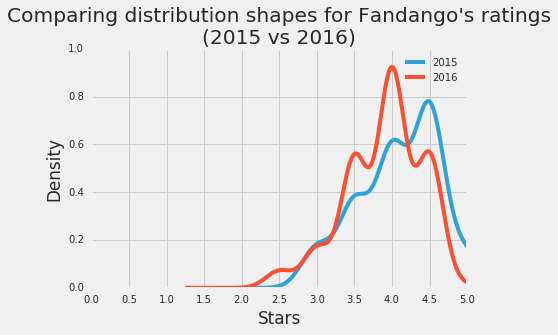

In [48]:
plt.style.use('fivethirtyeight')
fandango_2015["Fandango_Stars"].plot.kde(label="2015",xlim=[0,5],xticks=[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0],legend=True)
fandango_2016["fandango"].plot.kde(label="2016",legend=True)
plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)")
plt.xlabel('Stars')

#plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

Two aspects are striking on the figure above:

Both distributions are strongly left skewed.
The 2016 distribution is slightly shifted to the left relative to the 2015 distribution.
The left skew suggests that movies on Fandango are given mostly high and very high fan ratings. Coupled with the fact that Fandango sells tickets, the high ratings are a bit dubious. It'd be really interesting to investigate this further — ideally in a separate project, since this is quite irrelevant for the current goal of our analysis.

The slight left shift of the 2016 distribution is very interesting for our analysis. It shows that ratings were slightly lower in 2016 compared to 2015. This suggests that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015.



# Comparing Relative Frequencies
It seems we're following a good thread so far, but we need to analyze more granular information. Let's examine the frequency tables of the two distributions to analyze some numbers. Because the data sets have different numbers of movies, we normalize the tables and show percentages instead.




In [49]:
fandango_2015["Fandango_Stars"].value_counts(normalize=True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [50]:
fandango_2016["fandango"].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. There clearly is a difference between the two frequency distributions.

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings and this challenges the direction of the change we saw on the kernel density plots.



In [51]:
mean_2015=fandango_2015["Fandango_Stars"].mean()
median_2015=fandango_2015["Fandango_Stars"].median()
mode_2015=fandango_2015["Fandango_Stars"].mode()[0]
mean_2016=fandango_2016["fandango"].mean()
median_2016=fandango_2016["fandango"].median()
mode_2016=fandango_2016["fandango"].mode()[0]
summary=pd.DataFrame()
summary["2015"]=[mean_2015,median_2015,mode_2015]
summary["2016"]=[mean_2016,median_2016,mode_2016]
summary.index=["mean","median","mode"]
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


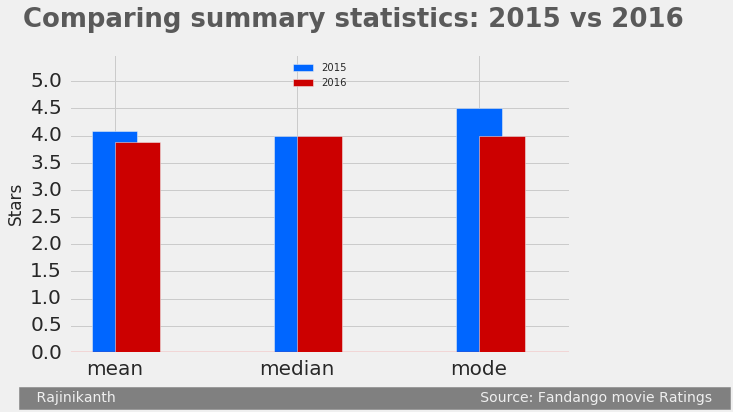

In [66]:
import seaborn as sns
from numpy import arange
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF',align='center',label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align='edge',label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

#plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.tick_params(axis="both",which="major",labelsize=20)
plt.axhline(y=0,color="red",linewidth=2.3,alpha=.7)
plt.text(x=-0.5,y = -0.9,
    s = '   Rajinikanth                                                                                 Source: Fandango movie Ratings   ',
    fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')

plt.text(x =-0.5, y =6, s = "Comparing summary statistics: 2015 vs 2016",
               fontsize = 26, weight = 'bold', alpha = .75)

plt.show()



The mean rating was lower in 2016 with approximately 0.2. This means a drop of almost 5% relative to the mean rating in 2015.



# Conclusion
Our analysis showed that there's indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system after Hickey's analysis.